### This notebook demonstrates N&B analysis from a single channel movie with confinement
The input is a detrended movie e.g. from sim_movie_confined_bleaching.ipynb.  The demonstration is with photon counting data.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import scipy.ndimage as ndi
import analysis_utils as simutils

In [5]:
#get the jet colormap with the under values set to white
ncmap=plt.colormaps['jet']
ncmap.set_under([1,1,1,1])

In [6]:
#read in our movie
stack=tifffile.imread('movie_confined_bleaching_detrend.tif')
stack.shape

(256, 128, 128)

In [7]:
#here we calculate all of the number and brightness statistic images
sms=2 #the smoothing standard deviation
thresh=0.5 #the threshold for calculating I and B
avg=stack.mean(axis=0)
var=stack.var(axis=0)
bright=var/avg-1.0
mask=avg<thresh #this is a boolean mask image denoting the threshold
avg[mask]=np.nan
bright[mask]=np.nan
#now do the smoothing
avgsm=simutils.gaussFilterNaN(avg,sigma=sms)
brightsm=simutils.gaussFilterNaN(bright,sigma=sms)

In [8]:
#get the autoscale information
amax=np.nanmax(avg)*1.1
brightmax=np.nanmax(bright)*1.1
print('max average',amax,'max brightness',brightmax)

max average 6.5484375 max brightness 3.566998805534063


In [9]:
plotavgmax=amax #change this to change the x dimensions of the histogram
plotbrightmax=brightmax #change this to change the y dimensions of the histogram
bins=(np.linspace(0,plotavgmax,64),np.linspace(0,plotbrightmax,64))

In [10]:
#get the filtered histogram values
avghistvals=avgsm.flat[~np.isnan(avgsm.flat)]
brighthistvals=brightsm.flat[~np.isnan(avgsm.flat)]

Text(0.5, 0, 'Intensity')

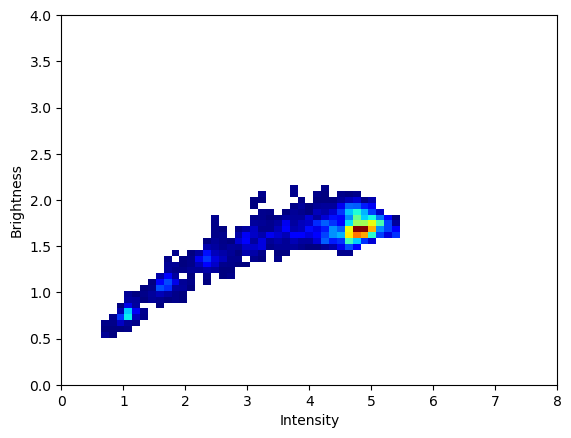

In [11]:
plotavgmax=8 #change this to change the x dimensions of the histogram
plotbrightmax=4.0 #change this to change the y dimensions of the histogram
bins=(np.linspace(0,plotavgmax,64),np.linspace(0,plotbrightmax,64))
plt.hist2d(avghistvals,brighthistvals,bins=bins,cmap=ncmap,vmin=0.5) #note that vmin=1 here allows the zero bins to be white
plt.ylabel('Brightness')
plt.xlabel('Intensity')

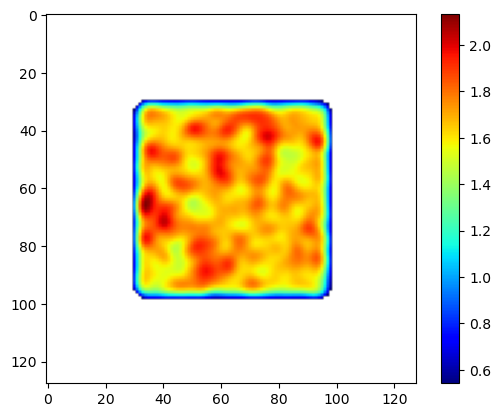

In [12]:
#show the brightness image
plt.imshow(brightsm,cmap=ncmap)
plt.colorbar()

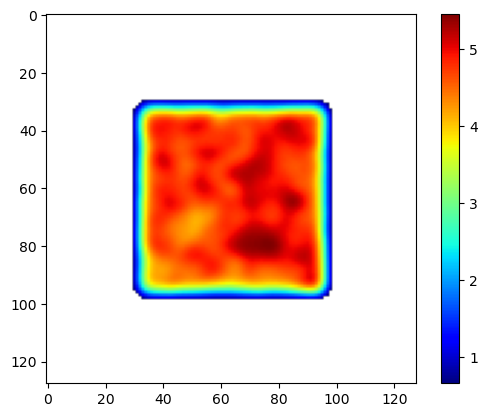

In [13]:
#show the intensity image
plt.imshow(avgsm,cmap=ncmap)
plt.colorbar()